# SMS Spam Detection – Data Exploration | Exploratory Data Analysis (EDA)

## Objective
The goal of this project is 
- to build a machine learning system
- can classify SMS messages as **spam** or **ham(not spam)**
- using Natural Language Processing techniques.
- Conduct Exploratory Data Analysis (EDA)- Understand patterns and characteristics of spam vs ham messages


  
In this notebook
- load the dataset and perform basic data exploration to understand its structur
- EDA helps us understand the dataset before applying machine learning models.
.


In [2]:
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Dataset Description
The dataset consists of SMS messages labeled as:
- **spam**: unwanted or promotional messages
- **ham**: legitimate personal messages

Each row represents one SMS message along with its corresponding la

## Dataset Cleaning

The dataset contains unnecessary columns which are not required for analysis.

so let's retain only useful columns.bel.


In [3]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


The original dataset uses 
- generic column names.  

We rename them to `label` and `message`
-  to make the data more readabl
-  easie  to work with in later stages


In [4]:
df.shape

(5572, 2)

In [5]:
df.columns

Index(['label', 'message'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [14]:
df.duplicated().sum()
df = df.drop_duplicates()
df.shape

(5169, 2)

In [6]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [10]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


### Observations
- The dataset contains both spam and ham messages.
- The number of ham messages is higher than spam messages, indicating class imbalance.
- This imbalance will be considered during model evaluation.

## Class Distribution Analysis

Understanding how many spam and ham messages exist.

This helps determine whether the dataset is balanced or imbalanced.


In [15]:
df['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

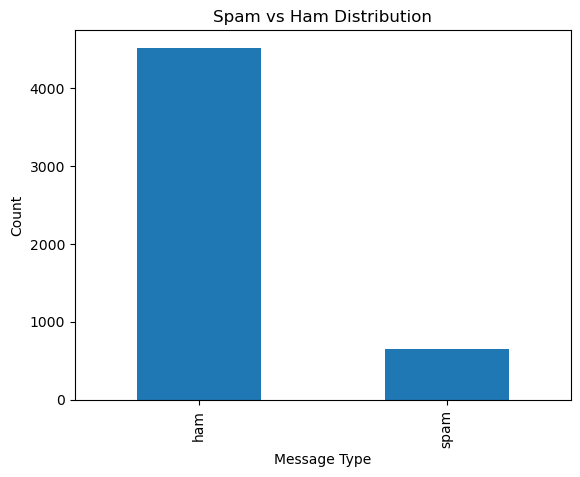

In [16]:
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar')
plt.title("Spam vs Ham Distribution")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()

### Observation

This visualization shows the distribution of spam and ham messages.

An imbalanced dataset may lead to biased model predictions.


## Message Length Analysis

Analyzing the length of messages to identify differences between spam and ham messages.

Message length may act as an important feature.


In [17]:
df['length'] = df['message'].apply(len)
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
df.groupby('label')['length'].mean()

label
ham      70.459256
spam    137.891271
Name: length, dtype: float64

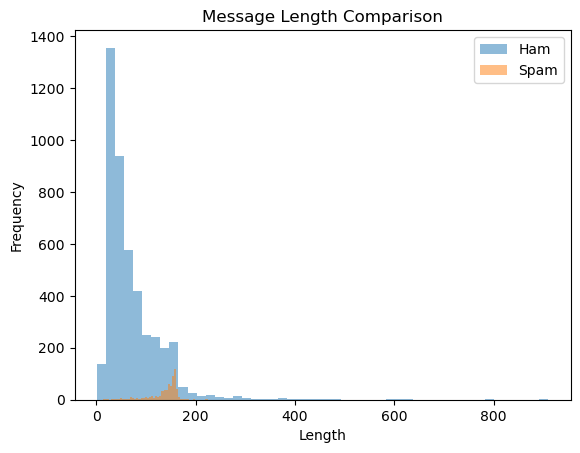

In [19]:
plt.hist(df[df['label']=='ham']['length'], bins=50, alpha=0.5, label='Ham')
plt.hist(df[df['label']=='spam']['length'], bins=50, alpha=0.5, label='Spam')

plt.legend()
plt.title("Message Length Comparison")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

### Observation

The histogram helps compare message length patterns.

Spam messages often show different length characteristics compared to ham messages.


## Word Count Analysis

Character length can be misleading.

Word count provides a more meaningful comparison.


In [21]:
df['word_count'] = df['message'].apply(lambda x: len(x.split()))
df.head()

,label,message,length,word_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,20
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,ham,U dun say so early hor... U c already then say...,49,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13


In [22]:
df.groupby('label')['word_count'].mean()

label
ham     14.134632
spam    23.681470
Name: word_count, dtype: float64

### Most Frequent Words

Analyzing commonly occurring words in spam and ham messages.

This reveals linguistic patterns useful for classification.


In [23]:
from collections import Counter

spam_words = Counter(" ".join(df[df['label']=='spam']['message']).split())
spam_words.most_common(20)

[('to', 522),
 ('a', 314),
 ('your', 171),
 ('call', 163),
 ('the', 160),
 ('or', 155),
 ('for', 152),
 ('2', 151),
 ('you', 150),
 ('is', 130),
 ('Call', 116),
 ('on', 112),
 ('have', 110),
 ('from', 109),
 ('and', 102),
 ('&', 89),
 ('with', 86),
 ('ur', 86),
 ('of', 79),
 ('FREE', 75)]

In [24]:
ham_words = Counter(" ".join(df[df['label']=='ham']['message']).split())
ham_words.most_common(20)

[('to', 1450),
 ('you', 1412),
 ('I', 1349),
 ('the', 954),
 ('a', 884),
 ('i', 714),
 ('and', 712),
 ('in', 677),
 ('u', 576),
 ('my', 570),
 ('is', 561),
 ('me', 513),
 ('for', 452),
 ('of', 452),
 ('that', 387),
 ('it', 357),
 ('your', 346),
 ('have', 337),
 ('on', 334),
 ('at', 316)]

### Observation

Spam messages often contain promotional or urgent words.

Ham messages typically contain conversational language.


## Thus, Exploratory Data Analysis provided key insights:

- Dataset distribution
- Message length patterns
- Word usage differences
- Linguistic characteristics of spam vs ham

These observations guide feature engineering and model building.
